In [2]:
import mdtraj
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import numpy as np
import pandas as pd

In [3]:
simulation_temperature = 282

In [4]:
traj = mdtraj.load_netcdf(
    'simulation_{}/trajectory.netcdf'.format(simulation_temperature), 
    top="../01_LEAP/1L2Y_P_h.prmtop"
)
ref = mdtraj.load_pdb("../1L2Y.pdb")

In [5]:
atom_indices = traj.top.select("(backbone)")
ref_indices = ref.top.select("(backbone)")
rmsd_backbone = mdtraj.rmsd(target=traj, reference=ref, frame=0, 
                 atom_indices=atom_indices,ref_indices=ref_indices) * 10

atom_indices = traj.top.select("(backbone) and (resid 2 to 18)")
ref_indices = ref.top.select("(backbone) and (resid 2 to 18)")
rmsd_backbone_2_18 = mdtraj.rmsd(target=traj, reference=ref, frame=0, 
                 atom_indices=atom_indices,ref_indices=ref_indices) * 10

atom_indices = traj.top.select("(protein)")
ref_indices = ref.top.select("(protein)")
rmsd_protein = mdtraj.rmsd(target=traj, reference=ref, frame=0, 
                 atom_indices=atom_indices,ref_indices=ref_indices) * 10

atom_indices = traj.top.select("(protein) and (resid 2 to 18)")
ref_indices = ref.top.select("(protein) and (resid 2 to 18)")
rmsd_protein_2_18 = mdtraj.rmsd(target=traj, reference=ref, frame=0, 
                 atom_indices=atom_indices,ref_indices=ref_indices) * 10

print min(rmsd_backbone_2_18)
print max(rmsd_backbone_2_18)

2.26853
6.95194


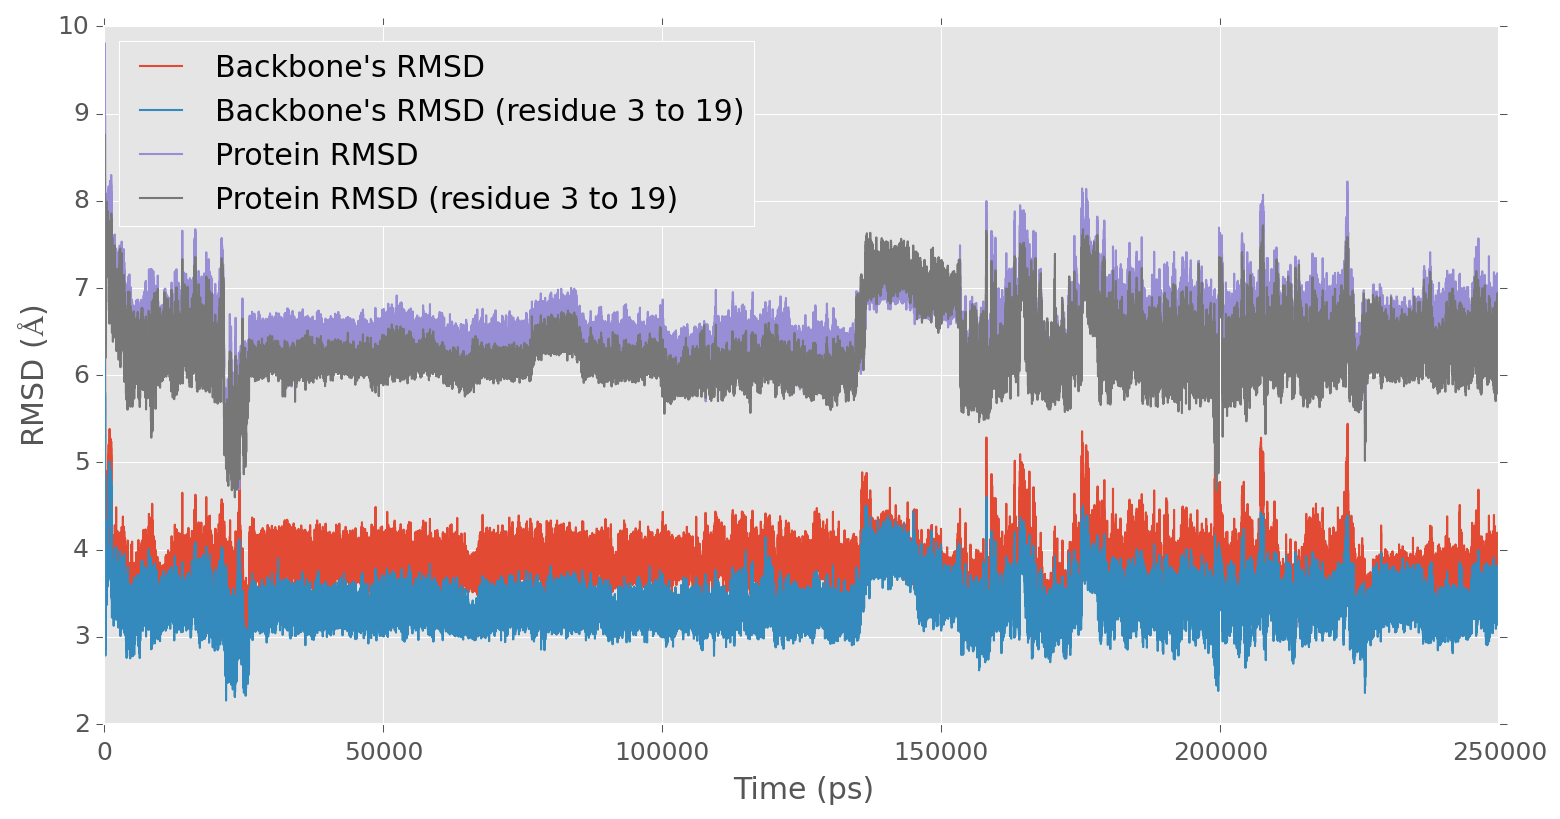

In [8]:
rmsds = pd.DataFrame({
        "Backbone's RMSD": rmsd_backbone, 
        'Protein RMSD': rmsd_protein, 
        "Backbone's RMSD (residue 3 to 19)": rmsd_backbone_2_18, 
        'Protein RMSD (residue 3 to 19)': rmsd_protein_2_18, 
})
rmsds.plot()
plt.ylabel('RMSD ($\AA$)')
plt.xlabel("Time (ps)")

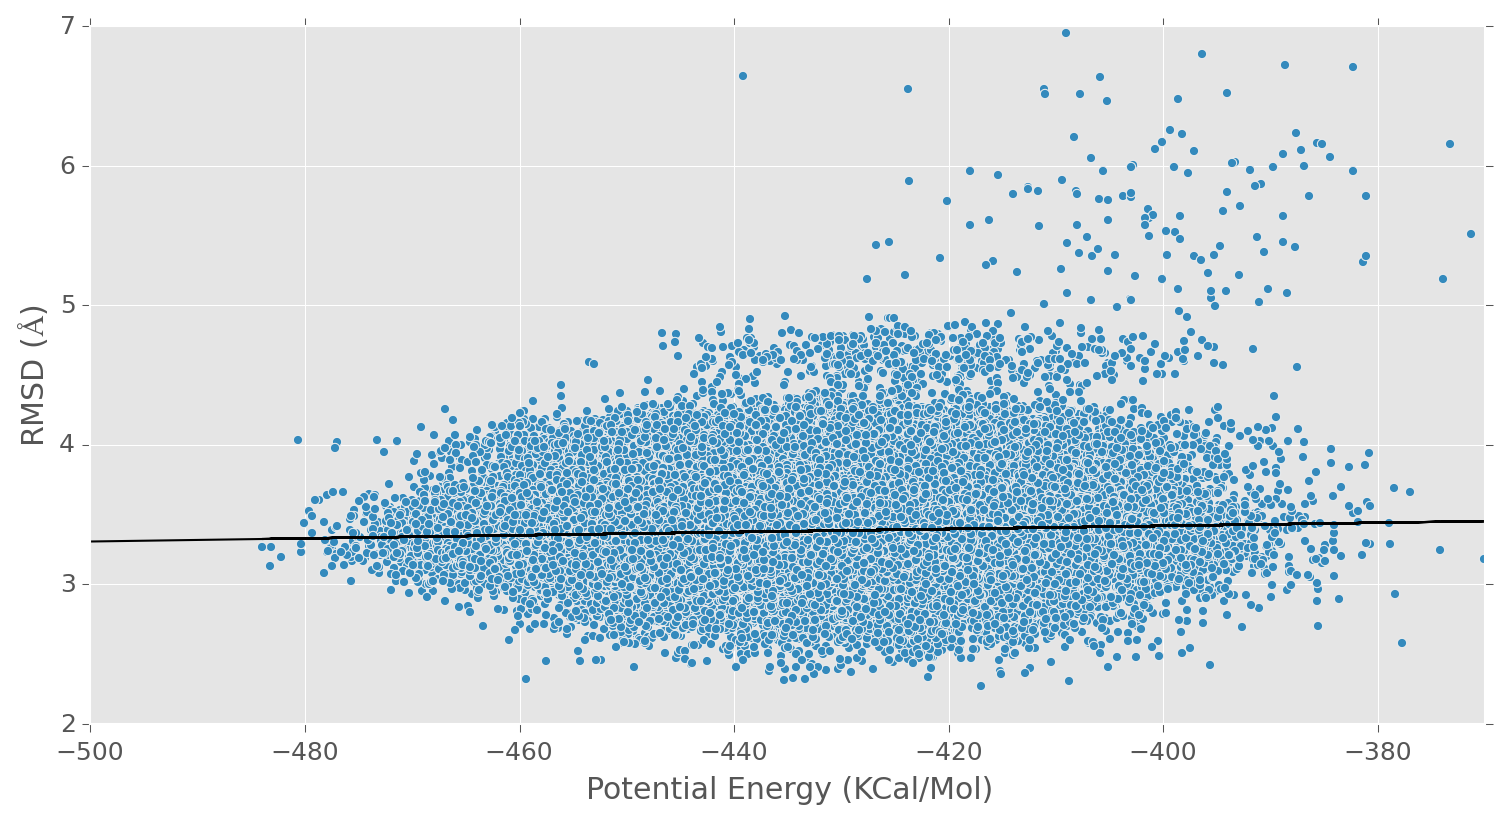

In [12]:
output = pd.read_fwf(
    'simulation_{}/summary.EPTOT'.format(simulation_temperature), 
    index_col=0,  
    colspecs=[(1, 12),(13, 29)], 
    names=['Time', 'Potential Energy']
)
output = output[:249999]
output['RMSD'] = rmsd_backbone_2_18
output.plot('Potential Energy', 'RMSD', kind='scatter')
plt.xlim([-500, -370])
plt.ylim([2, 7])

plt.ylabel('RMSD ($\AA$)')
plt.xlabel("Potential Energy (KCal/Mol)")

m, b = np.polyfit(output['Potential Energy'], output['RMSD'], 1)
plt.plot(output['Potential Energy'], m * output['Potential Energy'] + b, '-', color='black')

In [ ]:
trp = traj.top.select("(resname TRP)")
sasa = mdtraj.shrake_rupley(traj, mode='residue')
np.save('simulation_{}/sasa'.format(simulation_temperature), sasa)
sasa

In [14]:
sasa = np.load('simulation_{}/sasa.npy'.format(simulation_temperature))
sasa_trp =[x[5] for x in sasa]

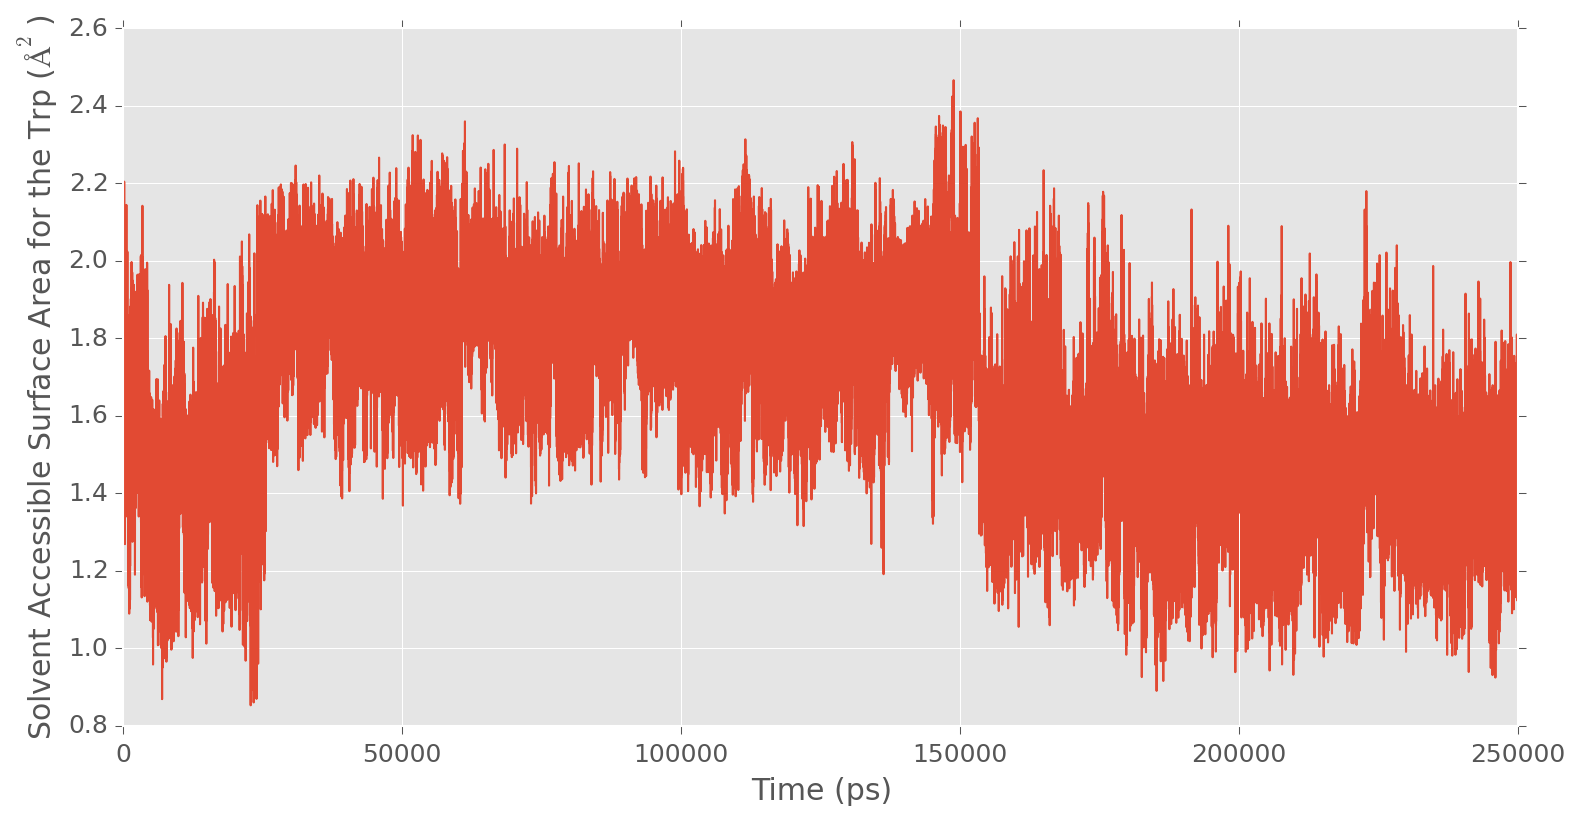

In [15]:
plt.plot(sasa_trp)
plt.ylabel('Solvent Accessible Surface Area for the Trp ($\AA^2$)')
plt.xlabel("Time (ps)")

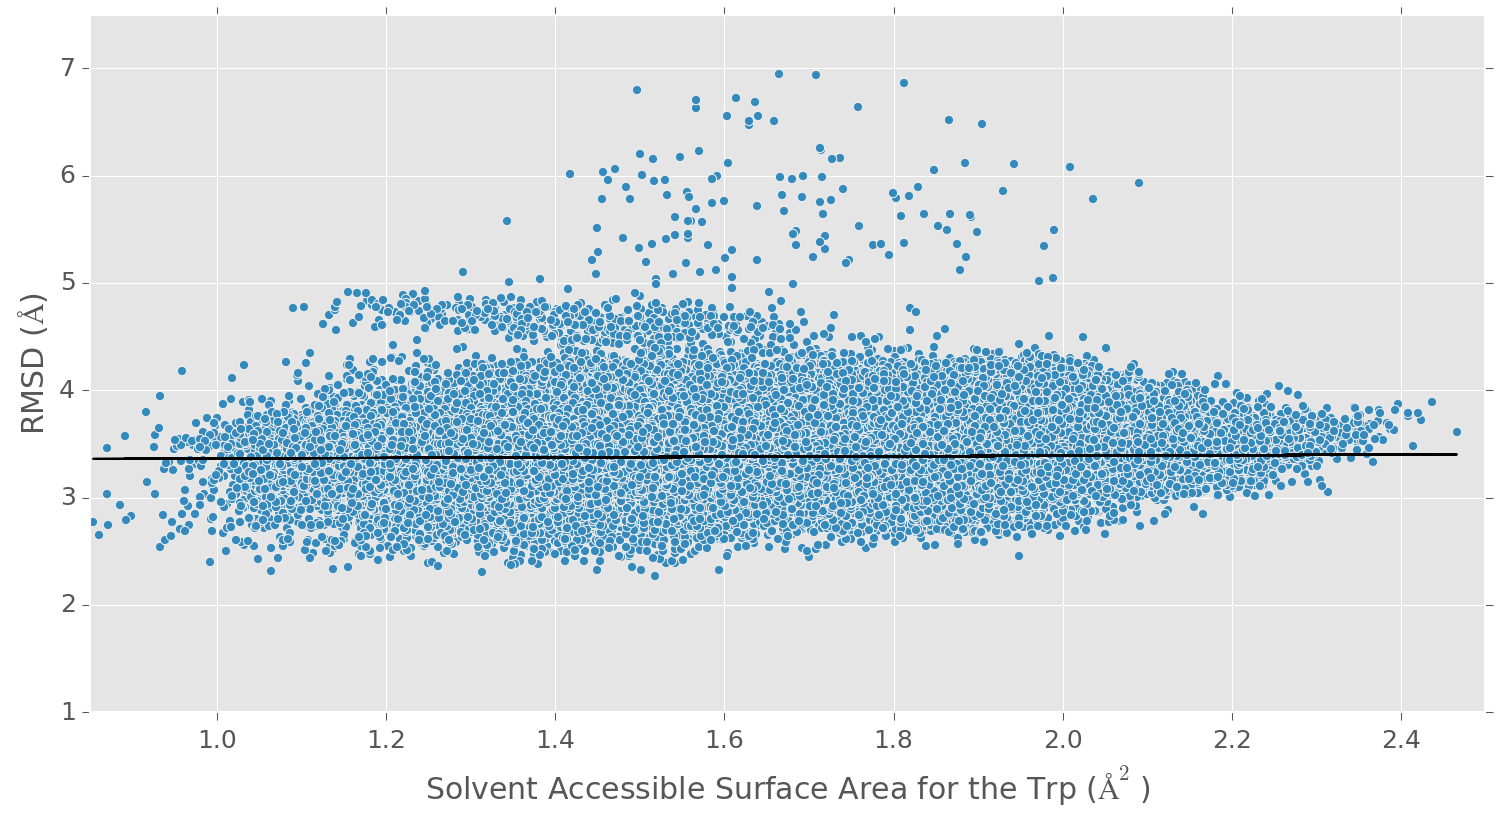

In [19]:
output['SASA'] = sasa_trp
output.plot('SASA', 'RMSD', kind='scatter')
plt.xlabel('Solvent Accessible Surface Area for the Trp ($\AA^2$)')
plt.ylabel('RMSD ($\AA$)')
plt.xlim((0.85, 2.5))
plt.ylim((1, 7.5))

m, b = np.polyfit(output['SASA'], output['RMSD'], 1)
plt.plot(output['SASA'], m * output['SASA'] + b, '-', color='black')

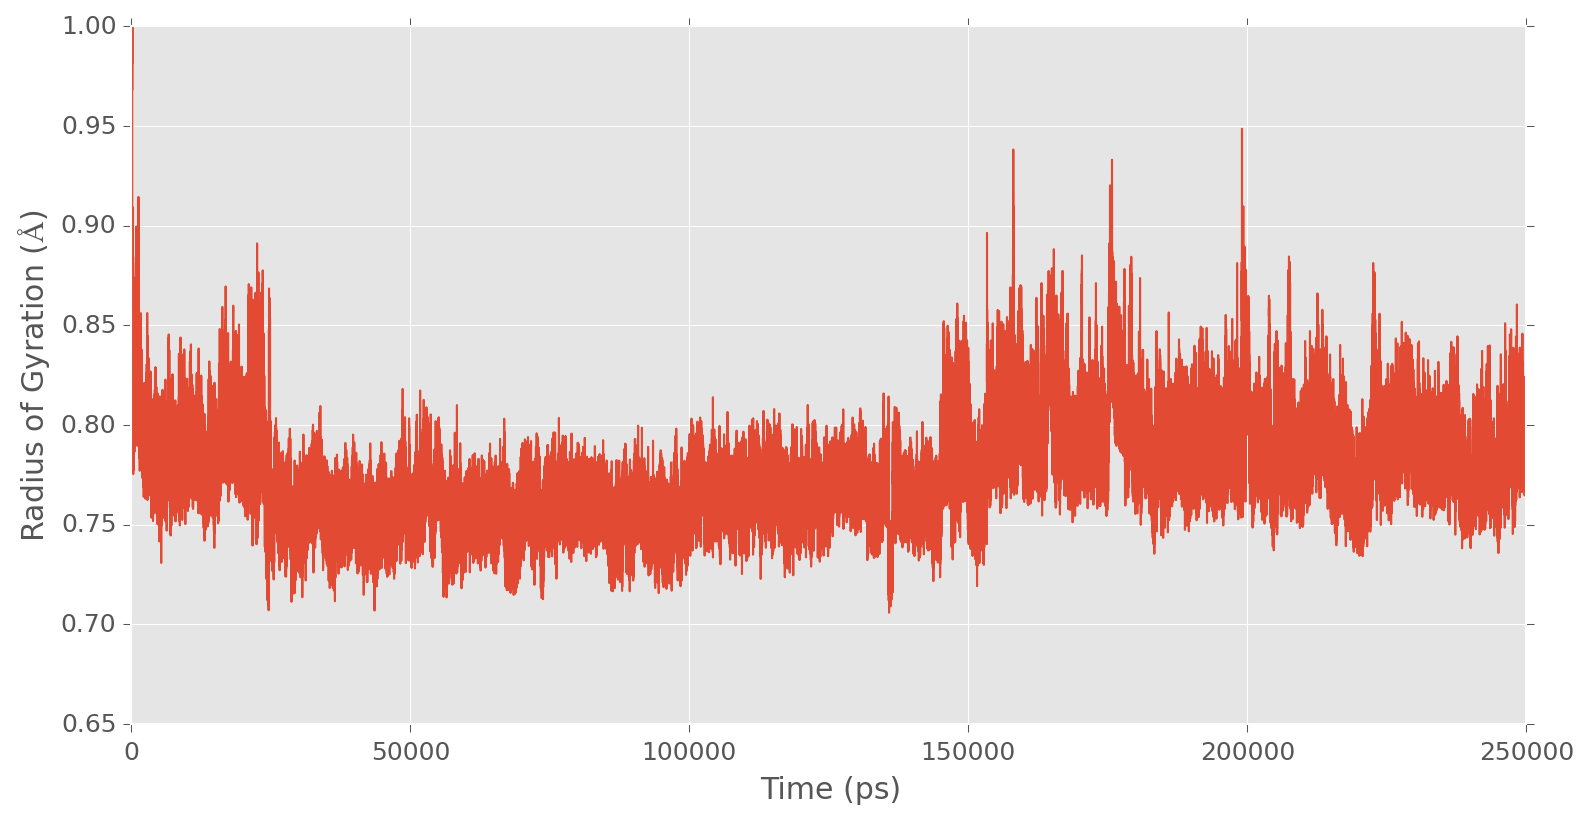

In [29]:
rg = mdtraj.compute_rg(traj)
plt.plot(rg)

plt.ylim((0.65, 1))
plt.ylabel('Radius of Gyration ($\AA$)')
plt.xlabel('Time (ps)')

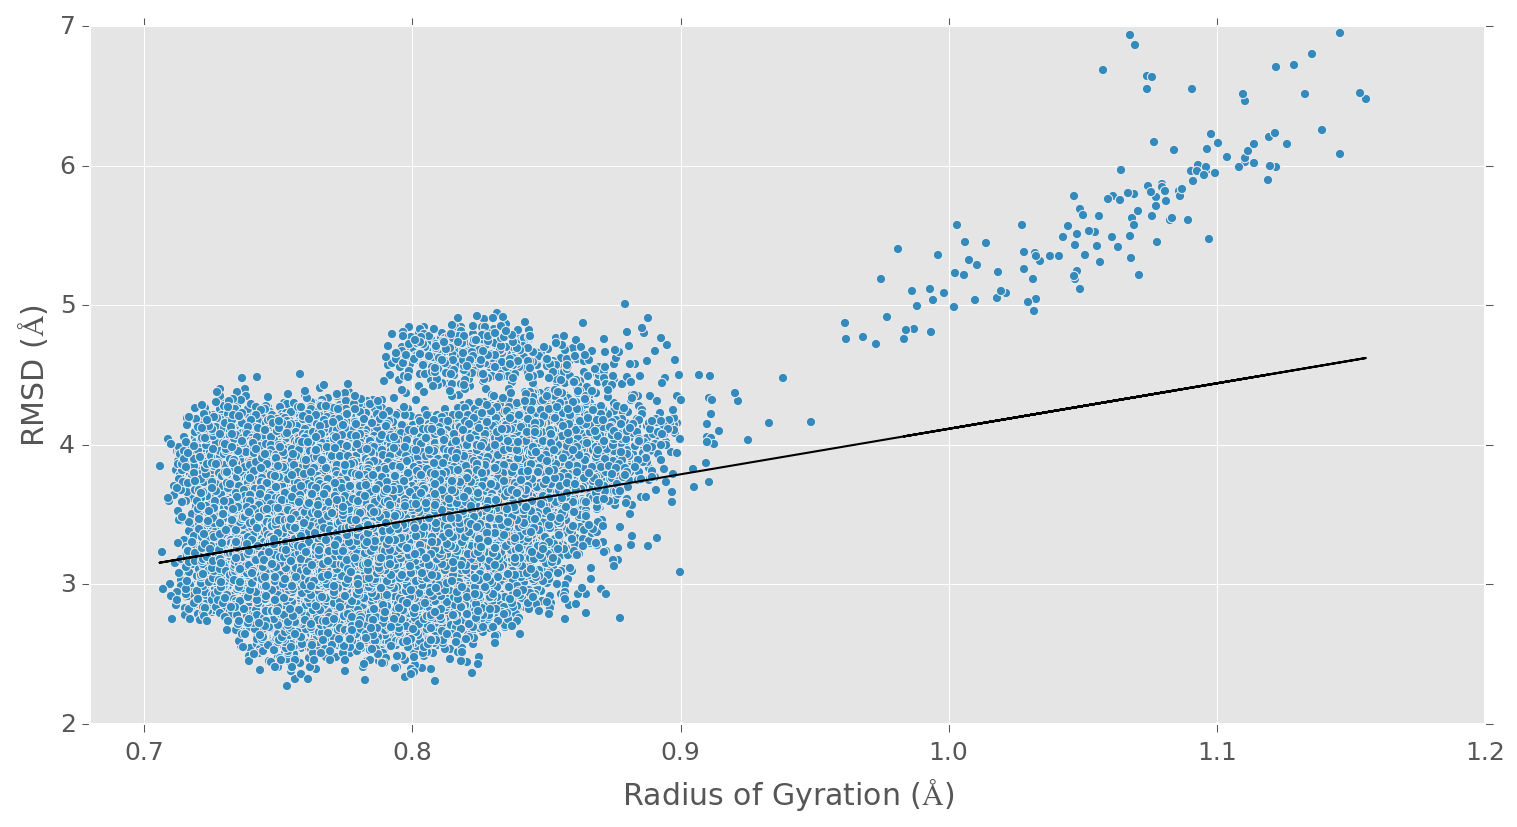

In [32]:
output['Radius of Gyration'] = rg
output.plot('Radius of Gyration', 'RMSD', kind='scatter')
plt.xlabel('Radius of Gyration ($\AA$)')
plt.ylabel('RMSD ($\AA$)')
plt.xlim((0.68, 1.2))
plt.ylim((2, 7))

m, b = np.polyfit(output['Radius of Gyration'], output['RMSD'], 1)
plt.plot(output['Radius of Gyration'], m * output['Radius of Gyration'] + b, '-', color='black')

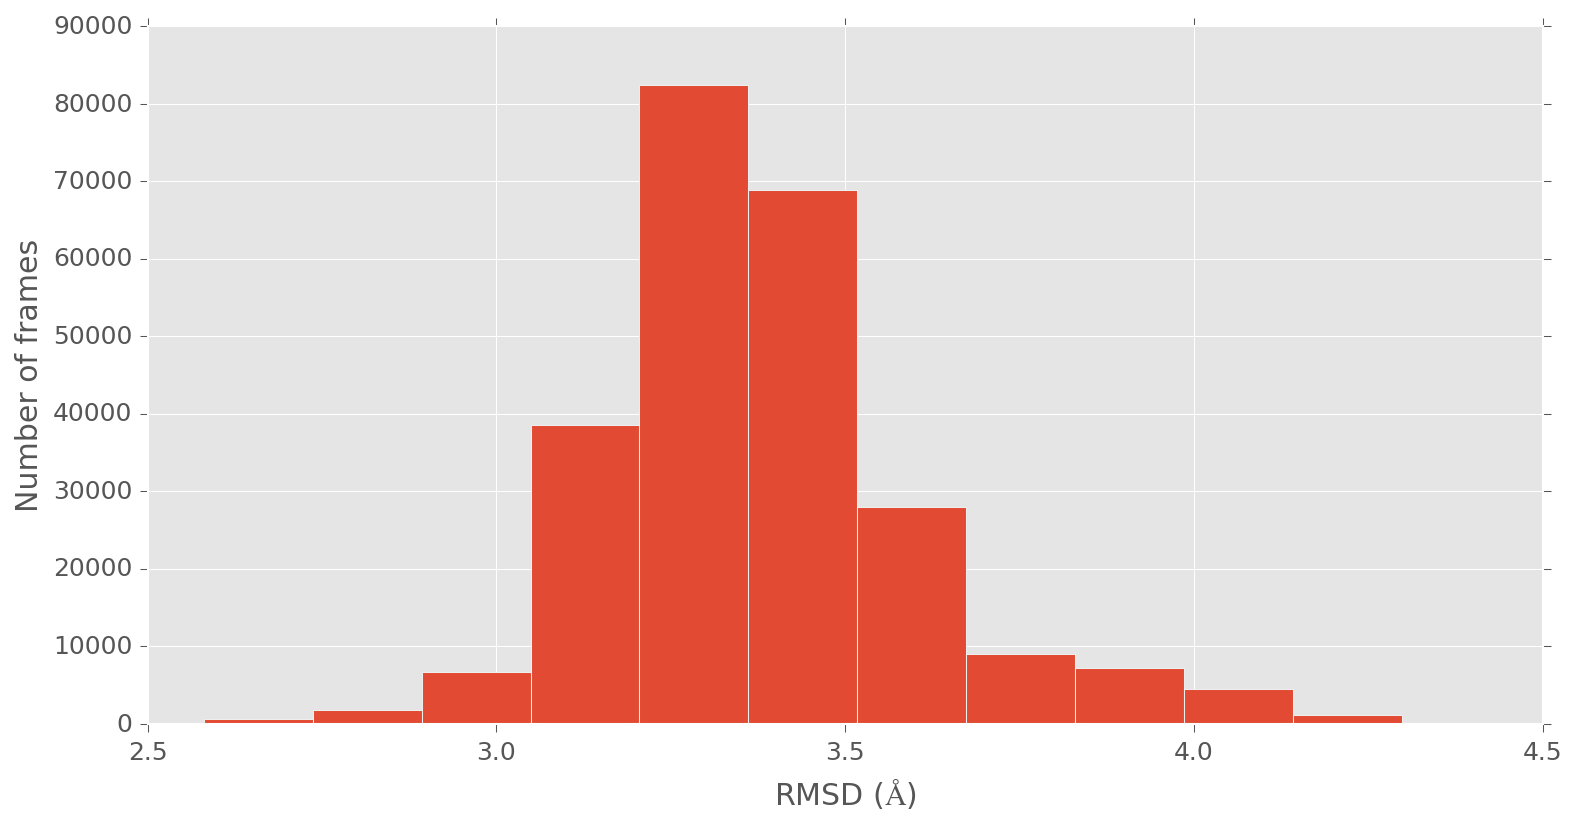

In [22]:
plot = plt.hist(rmsd_backbone_2_18, bins=30)
plt.xlim([2.5, 4.5])
plt.xlabel('RMSD ($\AA$)')
plt.ylabel("Number of frames")

In [23]:
rds = []
atom_indices = traj.top.select("(backbone) and (resid 2 to 18)")
ref_indices = ref.top.select("(backbone) and (resid 2 to 18)")

for frame in range(ref.n_frames):
    rd = mdtraj.rmsd(target=traj, reference=ref, frame=frame, 
                     atom_indices=atom_indices,ref_indices=ref_indices) * 10    
    rds.append(rd)

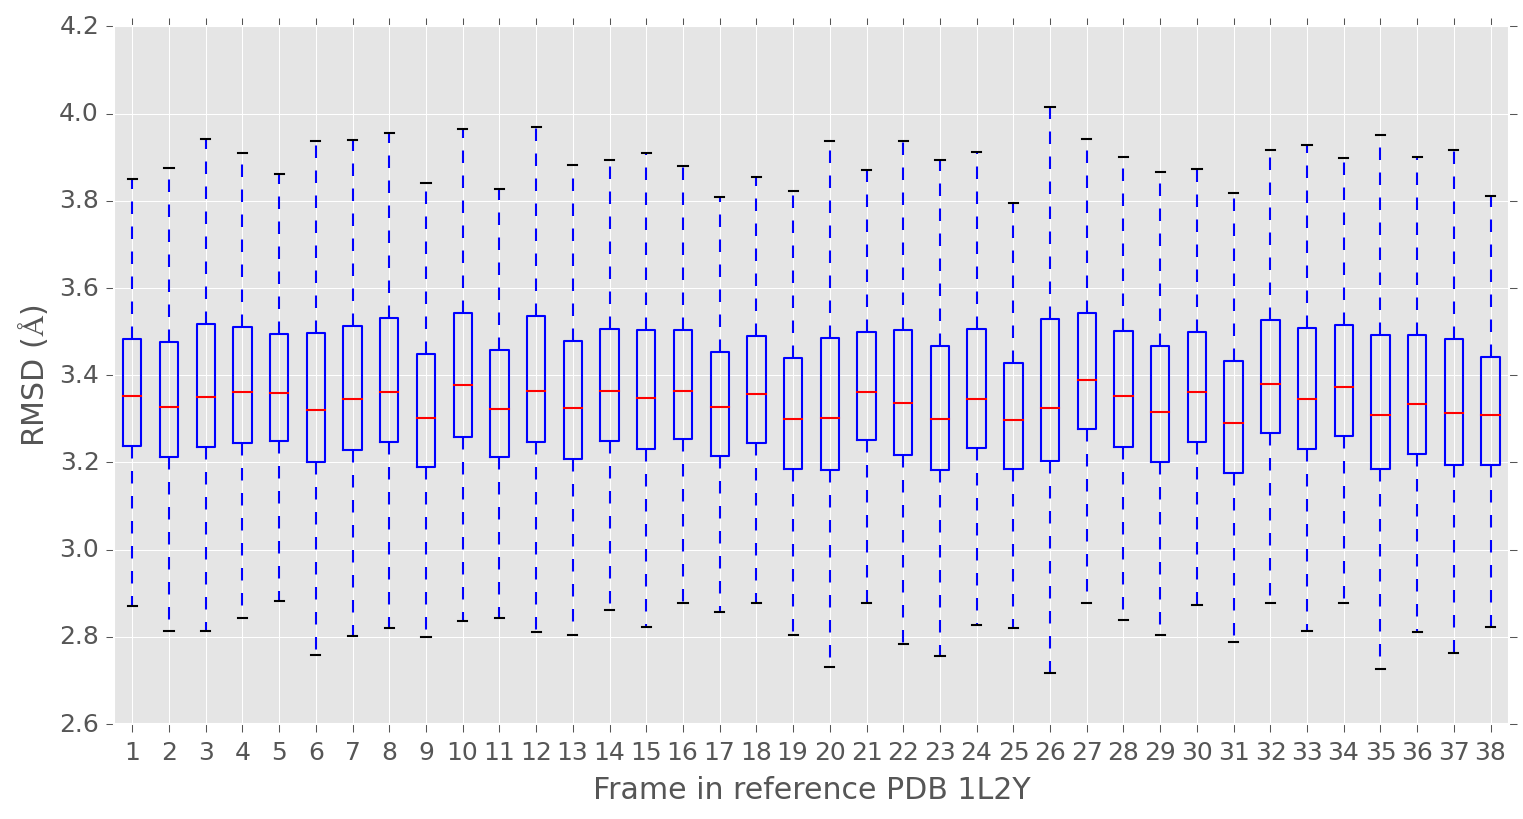

In [24]:
plot = plt.boxplot(rds, sym='', vert=True)
plt.ylabel('RMSD ($\AA$)')
plt.xlabel("Frame in reference PDB 1L2Y")

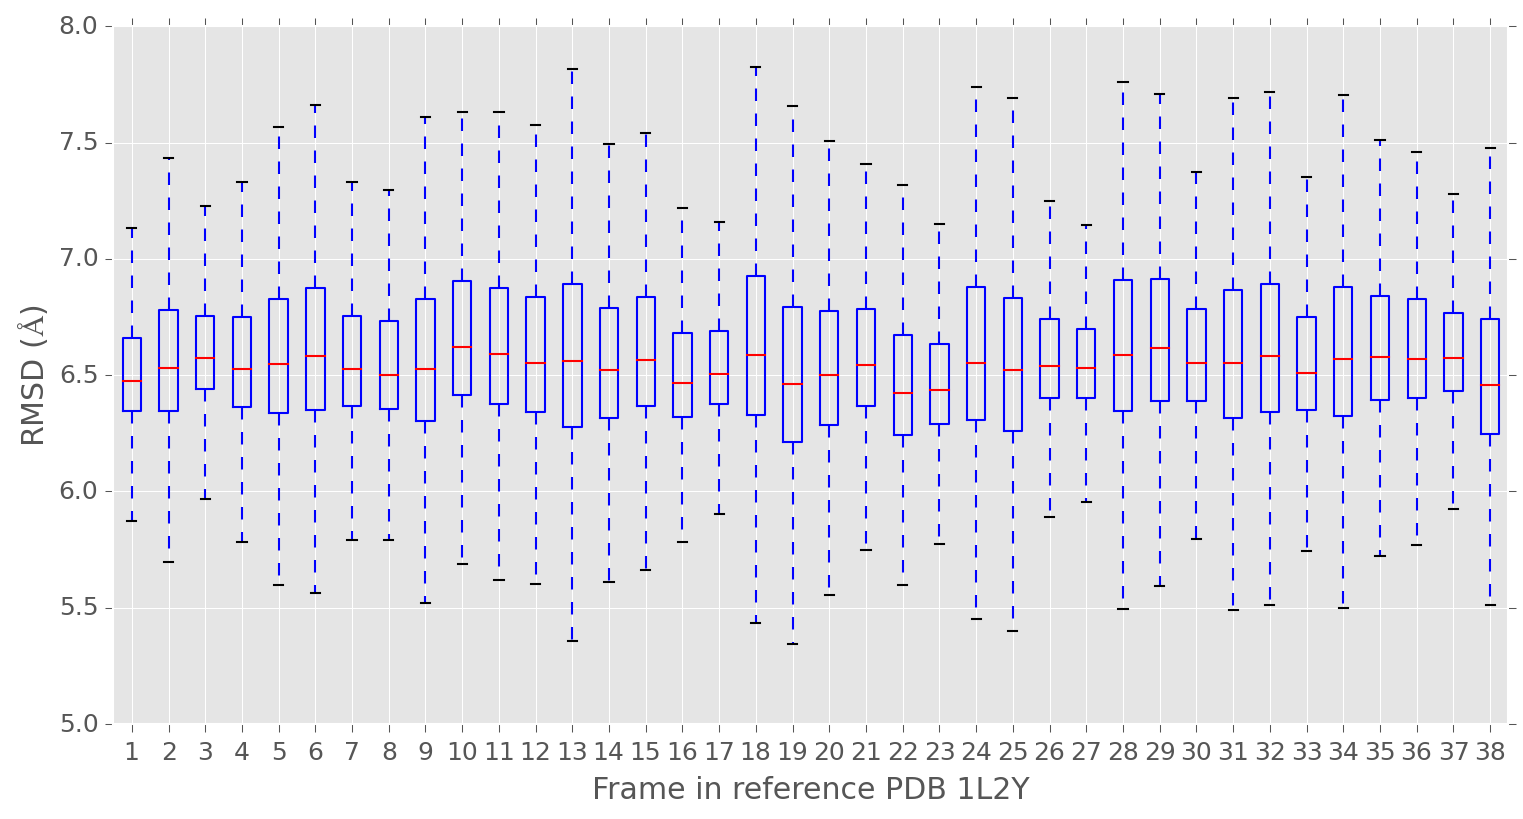

In [25]:
rds = []
atom_indices = traj.top.select("(protein)")
ref_indices = ref.top.select("(protein)")

for frame in range(ref.n_frames):
    rd = mdtraj.rmsd(target=traj, reference=ref, frame=frame, 
                     atom_indices=atom_indices,ref_indices=ref_indices) * 10    
    rds.append(rd)
    
    
plot = plt.boxplot(rds, sym='', vert=True)
plt.ylabel('RMSD ($\AA$)')
plt.xlabel("Frame in reference PDB 1L2Y")

In [33]:
output.to_csv('simulation_{}/output.csv'.format(simulation_temperature))
output

,Potential Energy,RMSD,SASA,Radius of Gyration
Time,,,,
0,-610.5483,6.865256,1.812845,1.069371
1,-610.7763,6.688903,1.635826,1.057312
2,-502.8577,6.937087,1.708584,1.067342
3,-439.1914,6.644371,1.758348,1.074040
4,-423.7712,6.552068,1.602764,1.073873
5,-405.8819,6.634645,1.566093,1.075842
6,-411.0948,6.554551,1.639727,1.090811
7,-405.2564,6.468683,1.628936,1.110303
8,-407.8243,6.514385,1.658148,1.132857
